# Programming for Engineers 2 - Team A2 Project
This python project is a tool to analyze measured data of wafers. 
It can plot and save graphs for any data you want, and also save xlsx files.  
<br/>
If you want to show or hide the raw code, press the button.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

***

## Index
1. [Introduction](#1.-Introduction)  
2. [Structure of the program](#2.-Structure-of-the-program)  
3. [How to launch the program](#3.-How-to-launch-the-program)  
4. [Example of analysis result](#4.-Example-of-analysis-result)  
5. [Results of all wafer data analysis](#5.-Results-of-all-wafer-data-analysis)  
    (1) [Wafer-Configuration](#(1)-Wafer-Configuration)  
    (2) [Device Type](#(2)-Device-Type)  
    (3) [Error of Wafers](#(3)-Error-of-Wafers)  
    (4) [Analysis Wavelength](#(4)-Analysis-Wavelength)  
    (5) [Rsq of Ref. Spectrum](#(5)-Rsq-of-Ref.-Spectrum)  
    (6) [Max Transmission of Ref. Spectrum](#(6)-Max-Transmission-of-Ref.-Spectrum)  
    (7) [Mix Transmission of Ref. Spectrum](#(7)-Min-Transmission-of-Ref.-Spectrum)  
    (8) [Rsq of IV](#(8)-Rsq-of-IV)  
    (9) [I at -1V](#(9)-I-at--1V)  
    (10) [I at 1V](#(10)-I-at-1V)  

***

## 1. Introduction
***

This software can take as an input a set of data in the form of .xml files selected by the user. The desired data by the user is then analyzed. The output is a set of .png and .xlsx files containing all the desired information.

The program gives the option of selecting all the offered data analysis options or just one of the output files to not fill the user with undesired data. Furthermore, the program bids the alternative of saving the requested files inside a folder or just showing them for a while.

<br/>

## 2. Structure of the program
***
The program is constructed in several python modules, that can be organized in three chunks, each one with a specific task to acomplish. Let's have a look to each python module:

- **Total plot**  
    The task of this module is to give the visual data analysis to the user and gives the option to store the .png files
    inside a folder or just float them on the user's screen. To accomplish this the module was constructed 
    in 3 separated modules:  
    - **Create_folder** : This modules creates the folder where all the data is stored.
    - **IV_plot** : Makes a plot of the Current-voltage measurements and fitting. It also shows the R² value.
    - **Tm_plot** : Makes 3 plots, the 1st is raw plot of the measurements, the 2nd are the fitting curves the last plot is the analyzed (flatted) data. As the previous module shows the R² value but it also differentiates the multiple DC bias values on the plotting.  


- **save_xlsx**  
    This modules organizes all the important data calculated by the software inside a .xlsx file is composed of 5 submodules:  
    - **Create_folder** : Has the same functionality of the previous one but in this case it only stores the .xlsx file inside a folder.  
    - **extract** : Locates, extracts, and aranges the data inside a list from the .xml file. The located data is the data that the users inputs.  
    - **IV_data** : Analyses and fits the IV measurements of each .xml selected file.  
    - **Tm_data** : Analyses and fits the Tm measurements of each .xml selected file.  
    - **error** : Calculates R² values of IV_data and Tm_data then it classify the data as an error if its above R²=0.996.  
    
    
- **filter**  
    Gives the order of only analyzing files requested by the user.


- **get_result**  
    Executes all the main modules. 

<br/>

## 3. How to launch the program
***

1. Execute **run.py**  


2. Insert the desired device type.  
   Ex. `LMZC` or `LMZO` or `LMZ` (`LMZ` means both)  
   ![method1](./picture/method1.png)  

3. Insert the desired wafer number in the form of "D00".  
   Ex. `D07` or `D07 D08 ...` or `all`  
   ![method2](./picture/method2.png) 

4. Insert the desired coordinates in form of "row,column".  
   Ex. `0,0` or `-1,0/1,1/...` or `all`  
   ![method3](./picture/method3.png) 

5. Insert "y" or "n" whether to float the data as png files or not.  
   Ex. `y` or `n`  
   ![method4](./picture/method4.png) 

6. Insert "y" or "n" whether to save the data as png files or not.  
   Ex. `y` or `n`  
   ![method5](./picture/method5.png) 

7. Insert "y" or "n" whether to save the data as xlsx files or not.  
   Ex. `y` or `n`  
   ![method6](./picture/method6.png) 

8. The files are saved in the `res` folder.
   ![result](./picture/result.png)
   
<br/>

## 4. Example of analysis result
***

![HY202103_D07_(0,0)_LION1_DCM_LMZC](./picture/HY202103_D07_(0,0)_LION1_DCM_LMZC.png)  

As explained in the user manual, if you input the desired wafer number and coordinates, you can save the analysis graph for it.  
It is saved in `res/png_files` with the folder name of the time you run it.  
The above graph is an example of entering `D07`, and `0,0`.  

<br/>

![Analysis_Result_A2](./picture/Analysis_Result_A2.png)  

Also, you can extract specific values as above and save them as xlsx files in `res/xlsx_files`.  
Tese are the values for the D07 wafer.  

<br/>

## 5. Results of all wafer data analysis
***

The data below is a result of analysis on all wafers that divided into 10 parts  
as `Wafer Configuaration`, `Device Type`, `Error`, `Analysis Wavelength`, `Rsq of Ref`, `Max transmission of Ref`, `Min transmission of Ref`, `Rsq of IV`, `I at -1V`, and `I at 1V`.  

<br/>

### (1) Wafer Configuration

In [126]:
df = pd.read_excel('./result/Analysis_Result_A2.xlsx')

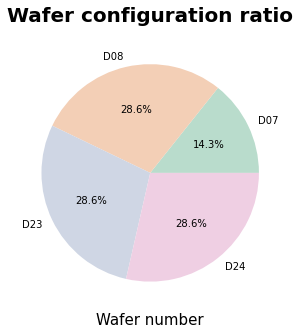

In [6]:
plt.figure(figsize=(16, 5))

ratio = [14*100/98, 28*100/98, 28*100/98, 28*100/98]
labels = ['D07', 'D08', 'D23', 'D24']
colors = ['#B9DCCC', '#F3CFB6', '#CFD6E4', '#EFCFE3']
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)

plt.title('Wafer configuration ratio', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Wafer number', fontsize=15)

plt.show()

> This is the ratio of the configuration of each wafer to the total number of wafers.  
> **D07 : 14.3%, D08 : 28.6%, D23 : 28.6%, D24 : 28.6%**
  


### (2) Device Type

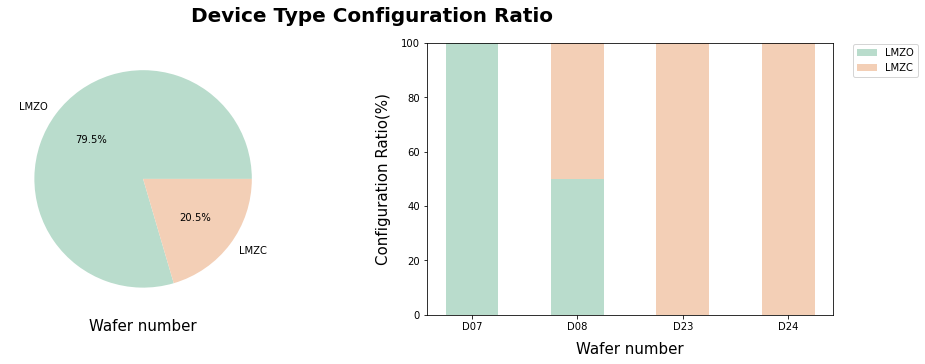

In [22]:
plt.figure(figsize=(16, 5))
plt.suptitle('Device Type Configuration Ratio', fontsize=20, fontweight='bold')

plt.subplot(1,2,1)

ratio = [70*100/98, 18*100/98]
labels = ['LMZO', 'LMZC']
colors = ['#B9DCCC', '#F3CFB6']

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)
plt.xlabel('Wafer number', fontsize=15)

plt.subplot(1,2,2)

LMZO=[0,50,100,100]
LMZC=[100,50,0,0]

wafer=["D07","D08","D23","D24"]

plt.bar(wafer,LMZC, color="#B9DCCC", label="LMZO", width=0.5)
plt.bar(wafer,LMZO, color="#F3CFB6", bottom=np.array(LMZC), label="LMZC", width=0.5)

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('Configuration Ratio(%)', fontsize=15, labelpad=10)

plt.legend(loc=(1.05,0.875))

plt.show()

> This is the configuration ratio of the device type.  
> **LMZO : 79.5%, LMZC : 20.5%**  
    > * D07 : LMZO : 100%, LMZC : 0%  
    > * D08 : LMZO : 50%, LMZC : 50%  
    > * D23 : LMZO : 0%, LMZC : 0%  
    > * D24 : LMZO : 0%, LMZC : 100%  


### (3) Error of Wafers

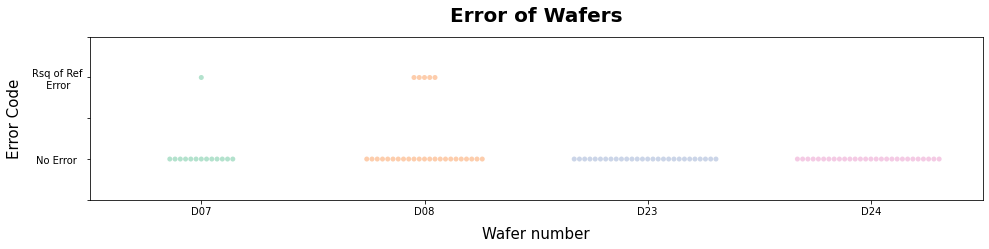

In [158]:
plt.figure(figsize=(16, 3))

sns.swarmplot(data = df, x = 'Wafer', y = 'Error Flag', palette='Pastel2')

plt.title('Error of Wafers', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('Error Code', fontsize=15, labelpad=10)
plt.yticks([-0.5, 0, 0.5, 1, 1.5], labels=['', 'No Error  ', '', 'Rsq of Ref\n Error    ', ''])

plt.show()


> R_square value that is out of a specific value is expressed as an error.  
    > * D07 : Rsq of Ref Error ➞ **1**  
    > * D08 : Rsq of Ref Error ➞ **5**  
    > * D23 : **Nothing Error**  
    > * D24 : **Nothing Error**  


### (4) Analysis Wavelength

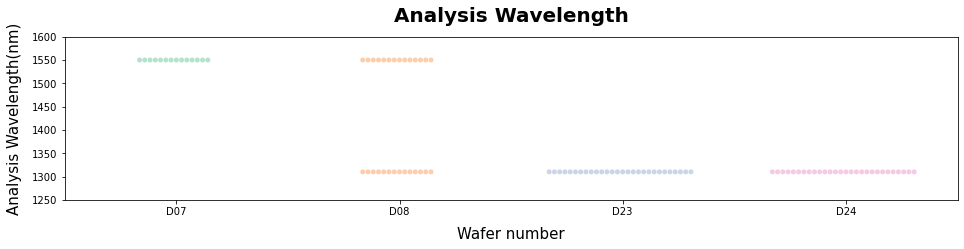

In [160]:
plt.figure(figsize=(16, 3))
sns.swarmplot(data = df, x = 'Wafer', y = 'Analysis Wavelength(nm)', palette='Pastel2')

plt.title('Analysis Wavelength', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('Analysis Wavelength(nm)', fontsize=15, labelpad=10)
plt.yticks(np.arange(1250, 1650, 50))

plt.show()

> This is the analysis wavelength for each wafer number.  
    > * D07 : λ=1300nm ➞ 0, λ=1550nm ➞ **14**  
    > * D08 : λ=1300nm ➞ **14**, λ=1550nm ➞ **14**  
    > * D23 : λ=1300nm ➞ **28**, λ=1550nm ➞ 0  
    > * D24 : λ=1300nm ➞ **28**, λ=1550nm ➞ 0  


### (5) Rsq of Ref. Spectrum

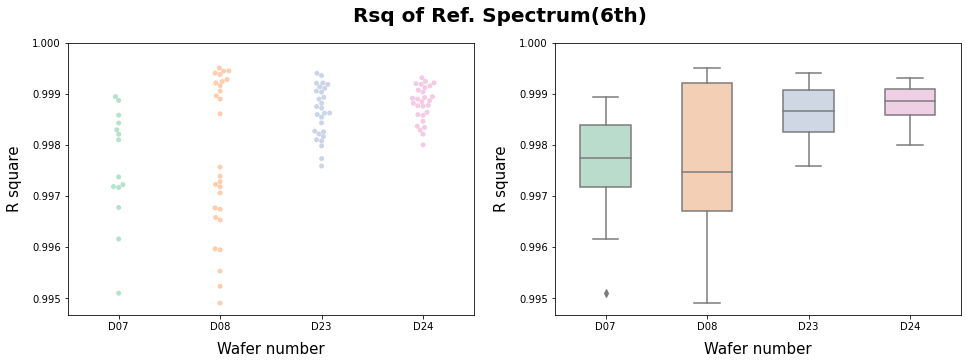

In [163]:
plt.figure(figsize=(16, 5))
plt.suptitle('Rsq of Ref. Spectrum(6th)', fontsize=20, fontweight='bold')

plt.subplot(1,2,1)
sns.swarmplot(data = df, x = 'Wafer', y = 'Rsq of Ref.spectrum(6th)', palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('R square', fontsize=15, labelpad=10)
plt.yticks([0.995, 0.996, 0.997, 0.998, 0.999, 1])

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Wafer', y = 'Rsq of Ref.spectrum(6th)', width = 0.5, palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('R square', fontsize=15, labelpad=10)
plt.yticks([0.995, 0.996, 0.997, 0.998, 0.999, 1])

plt.show()

> This is the R² value for each wafer number.  
> In the figure on the right, it is expressed as a box plot.  
> There are 4 areas by dividing line, which means 25% per area.
    > * In the case of **D07**, it has an R² distribution between approximately 0.997 and 0.9985.
    > * In the case of **D08**, it has the widest distribution area and has both maximum and minimum R².  
    The reason for having a wide distribution area seems to be that it contains both LMZO and LMZC data.  
    > * In the case of **D23** and **D24**, it has a narrow distribution area, but has a high accuracy of R² more than 0.998.


### (6) Max Transmission of Ref. Spectrum

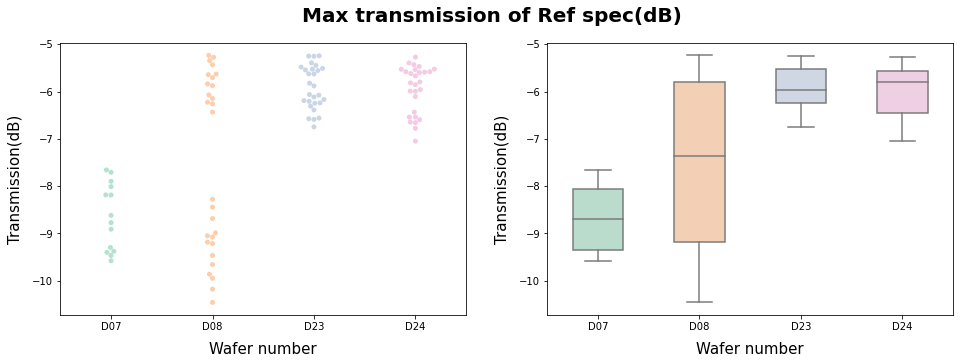

In [164]:
plt.figure(figsize=(16, 5))
plt.suptitle('Max transmission of Ref spec(dB)', fontsize=20, fontweight='bold')

plt.subplot(1,2,1)
sns.swarmplot(data = df, x = 'Wafer', y = 'Max transmission of Ref spec(dB)', palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('Transmission(dB)', fontsize=15, labelpad=10)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Wafer', y = 'Max transmission of Ref spec(dB)', width = 0.5, palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('Transmission(dB)', fontsize=15, labelpad=10)

plt.show()

> This is the maximum transmission for each wafer number.  
> This was also expressed as a boxplot.  
    > * In the case of **D07**, it has an Transmission distribution between approximately -9.5dB and -8dB.
    > * In the case of **D08**, it has the widest distribution area.  
    Likewise, The reason for having a wide distribution area seems to be that it contains both LMZO and LMZC data.  
    In general, LMZO transmission has a high value and LMZC transmission has a low value.
    > * In the case of **D23** and **D24**, it has a narrow distribution area, but has a high value of transmission more than others.


### (7) Min Transmission of Ref. Spectrum

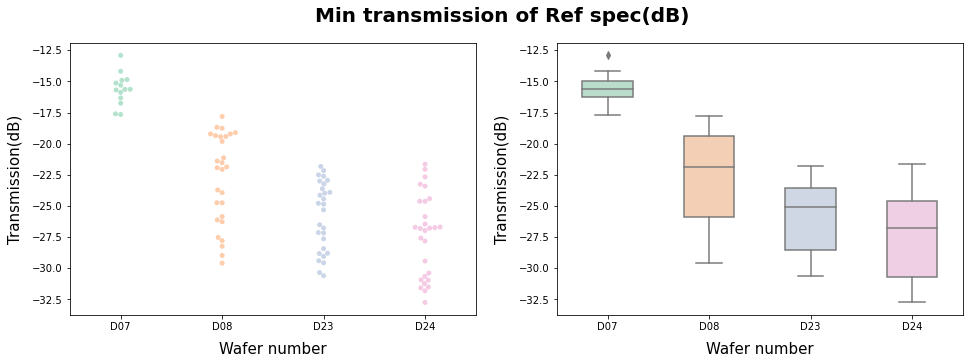

In [165]:
plt.figure(figsize=(16, 5))
plt.suptitle('Min transmission of Ref spec(dB)', fontsize=20, fontweight='bold')

plt.subplot(1,2,1)
sns.swarmplot(data = df, x = 'Wafer', y = 'Min transmission of Ref spec(dB)', palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('Transmission(dB)', fontsize=15, labelpad=10)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Wafer', y = 'Min transmission of Ref spec(dB)', width = 0.5, palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('Transmission(dB)', fontsize=15, labelpad=10)

plt.show()

> This is the minimum transmission for each wafer number.  
> This was also expressed as a boxplot.  
    > * In the case of **D07**, It has the narrowest distribution range and the largest minimum value.
    > * In the case of **D08**, **D23** and **D24**, Their distribution ranges are similar, but the larger the wafer number, the smaller the minimum value.


### (8) Rsq of IV

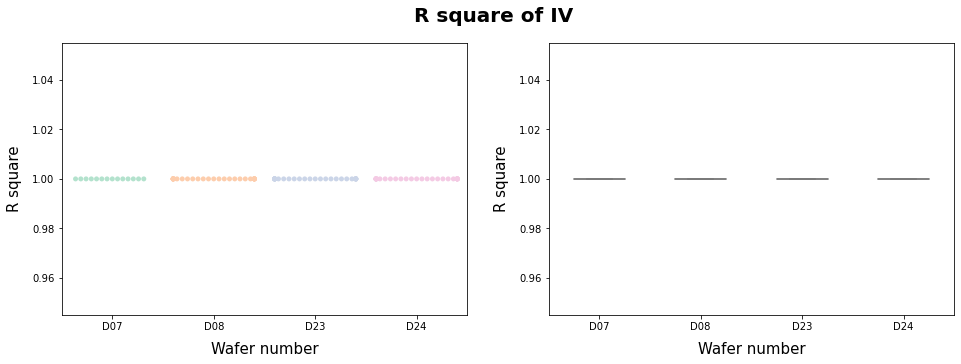

In [166]:
plt.figure(figsize=(16, 5))
plt.suptitle('R square of IV', fontsize=20, fontweight='bold')

plt.subplot(1,2,1)
sns.swarmplot(data = df, x = 'Wafer', y = 'Rsq of IV', palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('R square', fontsize=15, labelpad=10)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Wafer', y = 'Rsq of IV', width = 0.5, palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('R square', fontsize=15, labelpad=10)

plt.show()

> When fitting IV data, fitting was performed through the following approximation equation.  
> It is expressed through the sum of **the shokley diode equation** and **the polynomial approximation equation** of integer multiple, and the order of the polynomial approximation equation is **12th** order.


```python
def IV_Fitting(v, i_s, q, nk, cst, v_list=[], c_list=[]):
    polyfit_iv = np.polyfit(v_list, c_list, 12)
    fit_iv = np.poly1d(polyfit_iv)
    return abs(i_s * (np.exp(q * v / nk) - 1)) + cst * fit_iv(v)
```

> This is the R² value of the IV for each wafer number.  
> Most R² has a value of **1.0**, but the three cases `D23:(0,0)`, `D24:(1,3)` and `D24:(0,-4)` have a value of **0.999999999999999999999**. It was also measured by rounding to 1 because it is approximated to 1.  
>  As a result, R² about IV of all wafers has a value of 1.0.


### (9) I at -1V

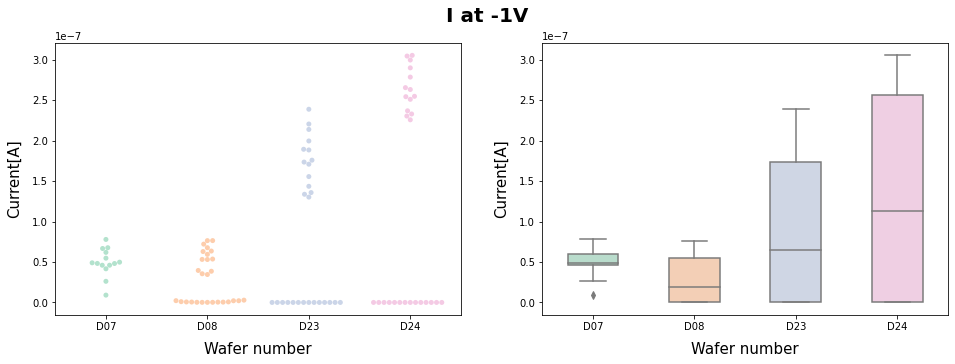

In [167]:
plt.figure(figsize=(16, 5))
plt.suptitle('I at -1V', fontsize=20, fontweight='bold')

plt.subplot(1,2,1)
sns.swarmplot(data = df, x = 'Wafer', y = 'I at -1V[A]', palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('Current[A]', fontsize=15, labelpad=10)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Wafer', y = 'I at -1V[A]', width = 0.5, palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('Current[A]', fontsize=15, labelpad=10)

plt.show()

> This is the current at -1V for each wafer number.  
> This was also expressed as a boxplot.
    > * In the case of **D07**, it has the narrowest distribution area and its value is around 0.5A.
    > * In the case of **D08**, **D23** and **D24**, Their distribution area increases as the wafer number increases.  
In addition, they all have a minimum value of 0 A because LMZO has a very small current value from -8 squared of 10 to -10 squared of 10 when the voltage is -1 V.

### (10) I at 1V

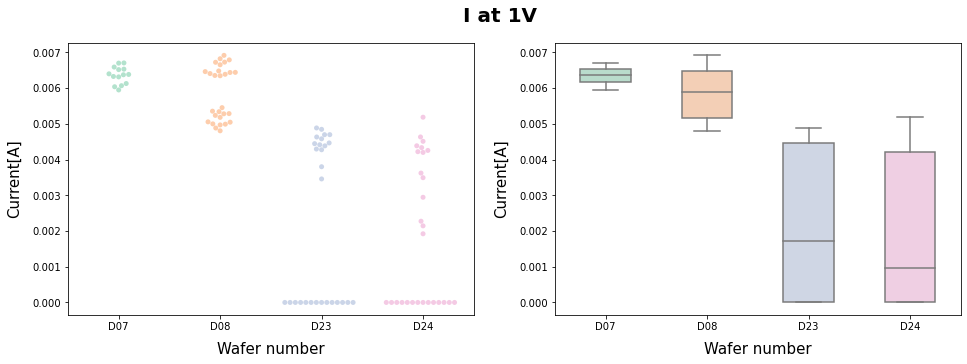

In [168]:
plt.figure(figsize=(16, 5))
plt.suptitle('I at 1V', fontsize=20, fontweight='bold')

plt.subplot(1,2,1)
sns.swarmplot(data = df, x = 'Wafer', y = 'I at 1V[A]', palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('Current[A]', fontsize=15, labelpad=10)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Wafer', y = 'I at 1V[A]', width = 0.5, palette='Pastel2')

plt.xlabel('Wafer number', fontsize=15, labelpad=10)
plt.ylabel('Current[A]', fontsize=15, labelpad=10)

plt.show()

> This is the current at 1V for each wafer number.  
> This was also expressed as a boxplot.
    > * In the case of **D07**, it has the narrowest distribution area and its value is around 0.006A to 0.007A.
    > * In the case of **D08**, Since LMZO has a distribution range of 0.006A to 0.007A, and LMZC has a distribution range of about 0.005A, it seems to have a distribution range of 0.005A to 0.007A as a whole.
    > * In the case of **D23** and **D24**, Their distribution range is very wide but similar.  
    This is because when the voltage is 1 V, it sometimes has a current value as small as the 10 squared of 10.

***
If you have any questions or feedback from our program or report, please contact us by email below.  
We will answer as soon as possible.

* **Collaborators**
    * Seo Jinchan : sjhmp21@hanyang.ac.kr  
    * Kim Chanyoung : belljy@hanyang.ac.kr  
    * Jose Alan Barraza Villaverde : al167694@alumnos.uacj.mx  

# Thank you :)